**Salary Prediction Using Linear Regression**

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.shape

(30, 3)

In [5]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


Z-score Normalization

In [7]:
np.std(df.Salary)

26953.65024877583

In [8]:
df.Salary.mean()

76004.0

In [9]:
df.Salary = (df.Salary-76004)/26953.65024877583

In [10]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,-1.360113
1,1,1.4,-1.105527
2,2,1.6,-1.419919
3,3,2.1,-1.204957
4,4,2.3,-1.339781
5,5,3.0,-0.718307
6,6,3.1,-0.588158
7,7,3.3,-0.799817
8,8,3.3,-0.428810
9,9,3.8,-0.698013


In [11]:
X = df[['YearsExperience']]
y = df['Salary']

In [12]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [14]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 5)
np.mean(mse)

-0.04427669593934911

In [15]:
reg_predict = regression.predict(X_test)

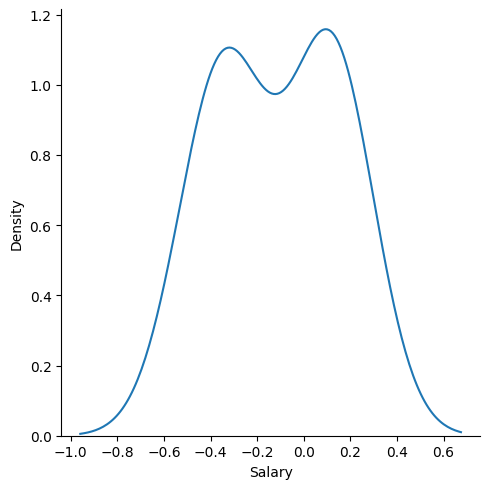

In [16]:
sns.displot(reg_predict-y_test,kind='kde')

In [17]:
df2=pd.DataFrame({"Actual_value":y_test,"Predicted_value":reg_predict,"Difference":y_test-reg_predict})
df2

,Actual_value,Predicted_value,Difference
27,1.359074,1.476134,-0.117061
15,-0.299217,-0.167128,-0.132089
23,1.402741,0.986652,0.416090
17,0.262859,-0.027276,0.290135
8,-0.428810,-0.761500,0.332690
9,-0.698013,-0.586685,-0.111328


In [18]:
print("MAE is: ",mean_absolute_error(y_test,reg_predict))
print("MAPE is: ",mean_absolute_percentage_error(y_test,reg_predict))
print("MSE is :", mean_squared_error(y_test,reg_predict))
print("R2 SCORE is: ",r2_score(y_test,reg_predict))

MAE is:  0.2332320028172533
MAPE is:  0.4772186151938264
MSE is : 0.06858932896507035
R2 SCORE is:  0.9024461774180498
